In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation #Animation
from IPython.display import HTML
import random

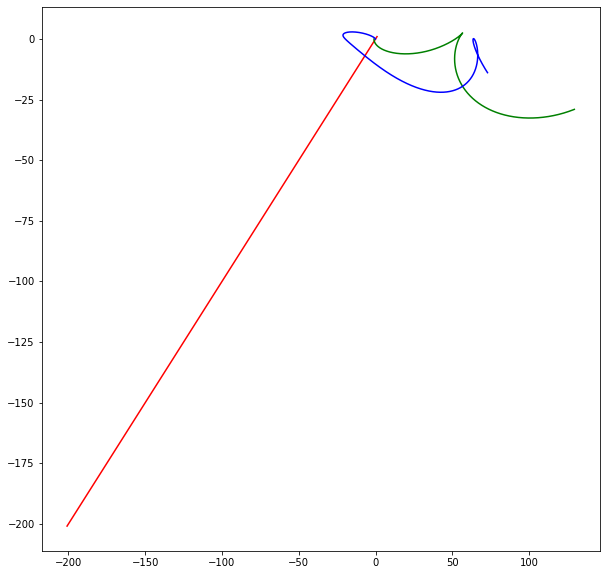

In [2]:
#Objective 5
G = 1
masses = [1, 1, 1]
positions = [[1,0], [-1,0], [0,0]]
velocities = [[0,1.556], [0,-1.556], [0.001556,0]]

r1,r2,r3 = [np.array([x,y]) for x,y in positions]
v1,v2,v3 = [np.array([vi,vj]) for vi,vj in velocities]
m1,m2,m3 = masses

def get_r_double_dot(r1,r2,r3):
    a1 = ((m2)*(r2-r1))/(np.linalg.norm(r2-r1)**3) + ((m3)*(r3-r1))/(np.linalg.norm(r3-r1)**3)
    a2 = ((m1)*(r1-r2))/(np.linalg.norm(r1-r2)**3) + ((m3)*(r3-r2))/(np.linalg.norm(r3-r2)**3)
    a3 = ((m1)*(r1-r3))/(np.linalg.norm(r3-r1)**3) + ((m2)*(r2-r3))/(np.linalg.norm(r3-r2)**3)
    return np.array([a1,a2,a3])

dt = 0.01
phasespace = [np.array([r1,r2,r3,v1,v2,v3])]
for i in np.arange(0,1000,dt):
    acc = get_r_double_dot(phasespace[-1][0],phasespace[-1][1],phasespace[-1][2])
    r1u = phasespace[-1][0] + phasespace[-1][3]*dt + 0.5*acc[0]*(dt**2)
    r2u = phasespace[-1][1] + phasespace[-1][4]*dt + 0.5*acc[1]*(dt**2)
    r3u = phasespace[-1][2] + phasespace[-1][5]*dt + 0.5*acc[2]*(dt**2)
    v1u = phasespace[-1][3] + acc[0]*dt
    v2u = phasespace[-1][4] + acc[1]*dt
    v3u = phasespace[-1][5] + acc[2]*dt
    phasespace.append(np.array([r1u,r2u,r3u,v1u,v2u,v3u]))
phasespace = np.array(phasespace)
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)
ax.plot(phasespace[:,0,0],phasespace[:,0,0],color="red")
ax.plot(phasespace[:,1,0],phasespace[:,1,1],color="green")
ax.plot(phasespace[:,2,0],phasespace[:,2,1],color="blue")
plt.show()

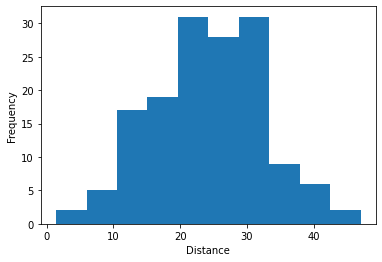

Average distance is : 24


In [4]:
#Objective 6
Rover_Path = "FLFLFFFLFFLFLFFRFFFFFFFFFRFFLFFLFFFFRFFFRFRFLFRFFFFRFFRFFFFFFLFFFLFFFFFLFFFFFFFFRFLFFFFFRFFLFLFRFFFFFFRFLFFFFRFRFFFFFFFFLFLFFFFFLFLFLFFFLFRFRFLFLFFRFFRFFFLFFLFFFLFFFFRFRFFRFFLFFFFFFFFFFRFFFFFFRFRFRFFFRFFLFFLFFFFFFFFFFFFFFFFFFFFFFFRFRFRFRFFLFFLFFFFLFFFRFRFLFFRFRFFFFFRFFRFRFFRFLFLFFFFFFFFFFLFFLFFFFFFFLFLFFFFLFLFRFLFRFFFRFFFFFRFFLFRFLFFRFFLFFFRFFLFFFFRFRFFFRFFFFLFFFLFFFRFFLFFLFRFRFRFFFRFFLFFRFFRFFLFLFFFFFFFF"

def rover_turns():
    if random.random()<0.45:
        return True
    return False

def path_progression():
    Pos = np.complex(0,0)
    Pos_t = np.complex(0,0)
    Facing = np.complex(1,0)
    for command in Rover_Path:
        if command == "F":
            Pos_t += Facing
            if rover_turns():
                Pos += Facing
        elif command == "R":
            Facing = np.complex(0,1)
        elif command == "L":
            Facing = np.complex(0,-1)
    return np.absolute(Pos-Pos_t)

Tries = [path_progression() for i in range(150)]
plt.hist(Tries)
plt.ylabel('Frequency')
plt.xlabel('Distance')
plt.show()
print("Average distance is : {0:.2g}".format(sum(Tries)/len(Tries),))

In [ ]:
#Objective 1:
import itertools
fuel = int(input("Enter the fuel:"))
lst = input("Enter the list: ")
lst = lst[1:-1]
lst = lst.split(',')
count = 1
X = []
while count!=fuel+1:
    for line in itertools.combinations_with_replacement(lst,count):
        s = list(line)
        a = 0
        for i in range(0,len(s)):
            a = a+int(s[i])
        if a == fuel:
            print(s)
        else:
            continue
    count = count+1



